In [3]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split

# data visualization
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing

# import cross validation and other evaluation tool 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# ??
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl

# set display options
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300
fig=plt.figure(figsize=(18,6))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1296x432 with 0 Axes>

In [0]:
# load dataset
data = pd.read_csv("Hotel_Bookings_Prepared.csv", index_col = "Unnamed: 0")

In [0]:
# view top 5 records
data.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_company,is_agent,is_diff_room_type,arrival_date_day_of_the_week,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,continent_Africa,continent_Antarctica,continent_Asia,continent_Australia,continent_Europe,continent_North America,continent_South America
0,0,0.464043,2015,27,1,0.0,0.00,0.036364,0.0,0.0,PRT,0,0.0,0.0,C,C,0.142857,0,NaN,0.0,0.001180,0.0,0,Check-Out,2015-07-01,False,True,True,Wednesday,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1.000000,2015,27,1,0.0,0.00,0.036364,0.0,0.0,PRT,0,0.0,0.0,C,C,0.190476,0,NaN,0.0,0.001180,0.0,0,Check-Out,2015-07-01,False,True,True,Wednesday,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.009498,2015,27,1,0.0,0.02,0.018182,0.0,0.0,GBR,0,0.0,0.0,A,C,0.000000,0,NaN,0.0,0.015053,0.0,0,Check-Out,2015-07-02,False,True,False,Wednesday,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.017639,2015,27,1,0.0,0.02,0.018182,0.0,0.0,GBR,0,0.0,0.0,A,A,0.000000,0,NaN,0.0,0.015053,0.0,0,Check-Out,2015-07-02,False,True,True,Wednesday,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.018996,2015,27,1,0.0,0.04,0.036364,0.0,0.0,GBR,0,0.0,0.0,A,A,0.000000,0,NaN,0.0,0.019307,0.0,1,Check-Out,2015-07-03,False,True,True,Wednesday,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
# feature selection
#features = list(data.columns.values)
#to_be_removed = ['is_canceled','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','country','reserved_room_type', 'assigned_room_type','agent', 'company','reservation_status', 'reservation_status_date','arrival_date_day_of_the_week','is_repeated_guest']
#for feature in to_be_removed:
    #features.remove(f"{feature}")

features = ['lead_time',
            'stays_in_weekend_nights',
            'stays_in_week_nights',
            'adults',
            'children',
            'babies',
            'previous_cancellations',
            'previous_bookings_not_canceled',
            'booking_changes',
            'days_in_waiting_list',
            'adr',
            'required_car_parking_spaces',
            'total_of_special_requests',
            'is_company',
            'is_agent',
            'is_diff_room_type',
            'hotel_City Hotel',
            'hotel_Resort Hotel',
            'arrival_date_month_April',
            'arrival_date_month_August',
            'arrival_date_month_December',
            'arrival_date_month_February',
            'arrival_date_month_January',
            'arrival_date_month_July',
            'arrival_date_month_June',
            'arrival_date_month_March',
            'arrival_date_month_May',
            'arrival_date_month_November',
            'arrival_date_month_October',
            'arrival_date_month_September',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'deposit_type_Refundable',
            'continent_Africa',
            'continent_Antarctica',
            'continent_Asia',
            'continent_Australia',
            'continent_Europe',
            'continent_North America',
            'continent_South America']

In [0]:
# define model features and label
X = data[features]
# change target column to array
y = data['is_canceled'].values.ravel()

In [0]:
# Split data - 40% for testing, 60% for training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=2)

In [0]:
# show testing record amount
y_test.shape

(47756,)

In [0]:
# modelling + tuning
LRM1 = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='saga',n_jobs=-1,max_iter = 4000)
LRM2 = LogisticRegression(penalty='l2', C=1.0, random_state=0, solver='saga',n_jobs=-1,max_iter = 4000)
LRM3 = LogisticRegression(penalty='l1', C=1.3, random_state=0, solver='saga',n_jobs=-1,max_iter = 4000)
LRM4 = LogisticRegression(penalty='l1', C=1.5, random_state=0, solver='saga',n_jobs=-1,max_iter = 4000)

In [0]:
# LRM1 - fit model
LRM1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=-1, penalty='l1', random_state=0,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [0]:
# LRM2 - fit model
LRM2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [0]:
# LRM3 - fit model
LRM3.fit(X_train,y_train)

LogisticRegression(C=1.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=-1, penalty='l1', random_state=0,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [0]:
# LRM4 - fit model
LRM4.fit(X_train,y_train)

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=-1, penalty='l1', random_state=0,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [0]:
# LRM1 - show coefficient of the features
LRM1_coefficient = pd.DataFrame(LRM1.coef_.flatten(), X_train.columns, columns=['Coefficient'])  
LRM1_coefficient.loc[LRM1_coefficient['Coefficient'] != 0]

,Coefficient
lead_time,-2.826552
stays_in_weekend_nights,-5.689814
stays_in_week_nights,-10.704669
adults,-13.289362
children,-1.196100
previous_cancellations,4.618523
previous_bookings_not_canceled,57.317290
booking_changes,0.172514
days_in_waiting_list,-2.079734
adr,-54.907249


In [0]:
# LRM2 - show coefficient of the features
LRM2_coefficient = pd.DataFrame(LRM2.coef_.flatten(), X_train.columns, columns=['Coefficient'])  
LRM2_coefficient.loc[LRM2_coefficient['Coefficient'] != 0]

,Coefficient
lead_time,-3.183128
stays_in_weekend_nights,-5.061773
stays_in_week_nights,-6.765408
adults,-4.033486
children,-2.555038
babies,-1.075655
previous_cancellations,5.022963
previous_bookings_not_canceled,19.050602
booking_changes,0.252808
days_in_waiting_list,-1.129970


In [0]:
# LRM3 - show coefficient of the features
LRM3_coefficient = pd.DataFrame(LRM3.coef_.flatten(), X_train.columns, columns=['Coefficient'])  
LRM3_coefficient.loc[LRM3_coefficient['Coefficient'] != 0]

,Coefficient
lead_time,-2.804867
stays_in_weekend_nights,-5.752507
stays_in_week_nights,-10.802377
adults,-14.787092
children,-1.329790
previous_cancellations,4.649441
previous_bookings_not_canceled,58.132133
booking_changes,0.369463
days_in_waiting_list,-2.818554
adr,-59.050538


In [0]:
# LRM4 - show coefficient of the features
LRM4_coefficient = pd.DataFrame(LRM4.coef_.flatten(), X_train.columns, columns=['Coefficient'])  
LRM4_coefficient.loc[LRM4_coefficient['Coefficient'] != 0]

,Coefficient
lead_time,-2.794702
stays_in_weekend_nights,-5.776589
stays_in_week_nights,-10.842025
adults,-15.433400
children,-1.390139
babies,-0.557153
previous_cancellations,4.664708
previous_bookings_not_canceled,58.493876
booking_changes,0.466483
days_in_waiting_list,-3.205212


In [0]:
# LRM1 - predict labels in testing set
# y_pred = predicted labels from testing set features (X_test)
y_pred1 = LRM1.predict(X_test)

In [0]:
# LRM2 - predict labels in testing set
y_pred2 = LRM2.predict(X_test)

In [0]:
# LRM3 - predict labels in testing set
y_pred3 = LRM3.predict(X_test)

In [0]:
# LRM4 - predict labels in testing set
y_pred4 = LRM4.predict(X_test)

In [0]:
# LRM1 - predict probability in testing set
# y_pred_prob = the probabilistic predictions
y_pred_prob1 = LRM1.predict_proba(X_test)

In [0]:
# LRM2 - predict probability in testing set
# y_pred_prob = the probabilistic predictions
y_pred_prob2 = LRM2.predict_proba(X_test)

In [0]:
# LRM3 - predict probability in testing set
y_pred_prob3 = LRM3.predict_proba(X_test)

In [0]:
# LRM4 - predict probability in testing set
y_pred_prob4 = LRM4.predict_proba(X_test)

In [0]:
# set decision threshold 
# y_pred_prob_0 = predicted result under the threshold
y_pred_prob1_0= [0 if i >= 0.70 else 1 for i in y_pred_prob1[:,0]]

In [0]:
# set decision threshold 
# y_pred_prob_0 = predicted result under the threshold
y_pred_prob2_0= [0 if i >= 0.70 else 1 for i in y_pred_prob2[:,0]]

In [0]:
y_pred_prob3_0= [0 if i >= 0.70 else 1 for i in y_pred_prob3[:,0]]

In [0]:
y_pred_prob4_0= [0 if i >= 0.70 else 1 for i in y_pred_prob4[:,0]]

In [0]:
# Evaluation Tools LGM1
print('LGM1')
print("Accuracy: \n",accuracy_score(y_test,y_pred_prob1_0,normalize=True,sample_weight=None))
print("Classification Report: \n",classification_report(y_test,y_pred_prob1_0))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_prob1_0))

# Evaluation Tools LGM2
print('LGM2')
print("Accuracy: \n",accuracy_score(y_test,y_pred_prob2_0,normalize=True,sample_weight=None))
print("Classification Report: \n",classification_report(y_test,y_pred_prob2_0))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_prob2_0))

# Evaluation Tools LGM3
print('LGM3')
print("Accuracy: \n",accuracy_score(y_test,y_pred_prob3_0,normalize=True,sample_weight=None))
print("Classification Report: \n",classification_report(y_test,y_pred_prob3_0))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_prob3_0))

# Evaluation Tools LGM4
print('LGM4')
print("Accuracy: \n",accuracy_score(y_test,y_pred_prob4_0,normalize=True,sample_weight=None))
print("Classification Report: \n",classification_report(y_test,y_pred_prob4_0))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_prob4_0))



# introduce majority classifier as the benchmark model (35817 is the testing record count)
pred_val_maj = np.zeros((47756,), dtype = int)
# Evaluation Tools Majority Classifier
print("Accuracy: \n",accuracy_score(y_test,pred_val_maj,normalize=True,sample_weight=None))
print("Classification Report: \n",classification_report(y_test,pred_val_maj))
print("Confusion Matrix: \n",confusion_matrix(y_test,pred_val_maj))

LGM1
Accuracy: 
 0.9784739090376079
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     46223
           1       0.76      0.49      0.59      1533

    accuracy                           0.98     47756
   macro avg       0.87      0.74      0.79     47756
weighted avg       0.98      0.98      0.98     47756

Confusion Matrix: 
 [[45984   239]
 [  789   744]]
LGM2
Accuracy: 
 0.9731761454058129
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     46223
           1       0.62      0.42      0.50      1533

    accuracy                           0.97     47756
   macro avg       0.80      0.71      0.74     47756
weighted avg       0.97      0.97      0.97     47756

Confusion Matrix: 
 [[45832   391]
 [  890   643]]
LGM3
Accuracy: 
 0.9784948488148086
Classification Report: 
               precision    recall  f1-score   support

      

In [0]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,y_pred_prob1[:,0],pos_label=0)

In [0]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test,y_pred_prob2[:,0],pos_label=0)

In [0]:
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test,y_pred_prob3[:,0],pos_label=0)

In [0]:
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test,y_pred_prob4[:,0],pos_label=0)

In [0]:
# LRM1 - AUC 
metrics.auc(fpr1, tpr1)

0.9183958226617412

In [0]:
# LRM2 - AUC
metrics.auc(fpr2, tpr2)

0.8920972662392681

In [0]:
# LRM3 - AUC
metrics.auc(fpr3, tpr3)

0.9187041495524286

In [0]:
# LRM4 - AUC
metrics.auc(fpr4, tpr4)

0.9188209011254171

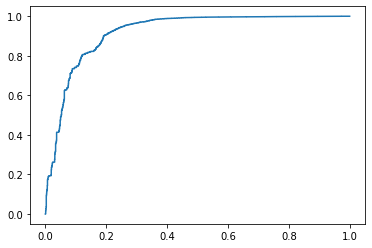

In [0]:
# ROC
plt.plot(fpr1,tpr1)

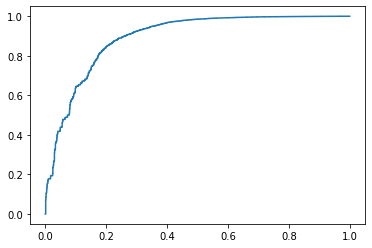

In [0]:
# ROC
plt.plot(fpr2,tpr2)